In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

from utils import prepare

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler = prepare()

In [3]:
tscv = TimeSeriesSplit()

In [4]:
def reg_scores(y_test, y_pred):
  return {
      "MAE": mean_absolute_error(y_test, y_pred),
      "MAPE": mean_absolute_percentage_error(y_test, y_pred),
      "MSE": mean_squared_error(y_test, y_pred),
      "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
      "R2": r2_score(y_test, y_pred)
  }

In [5]:
models = {
  "Linear Regression": LinearRegression(),
  "Lasso": Lasso(),
  "Ridge": Ridge(),
  "ElasticNet": ElasticNet(),
  "KNN": KNeighborsRegressor(),
  "SVR": LinearSVR(),
  "Decision Tree": DecisionTreeRegressor(),
  "Random Forest": RandomForestRegressor(),
  "Extra Trees": ExtraTreesRegressor(),
  "AdaBoost": AdaBoostRegressor(),
  "Gradient Boosting": GradientBoostingRegressor()
}

baseline_val_scores = list()
baseline_test_scores = list()
baseline_test_scores_actual = dict()

In [6]:
for i, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
  for name, model in models.items():
    X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = y_train_scaled[train_idx], y_train_scaled[val_idx]

    model.fit(X_train_cv, y_train_cv.flatten())
    y_pred_val = model.predict(X_val_cv)
    val_mse = mean_squared_error(y_pred_val, y_val_cv)

    baseline_val_scores.append((name, f"fold_{i}", val_mse))

D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
val_mse_df = pd.DataFrame(baseline_val_scores, columns=["name", "fold", "loss"])
val_mse_df["name"] = pd.Categorical(val_mse_df["name"])

In [8]:
pd.pivot_table(val_mse_df, values=["loss"], index=["name", "fold"], sort=False)

loss
name              fold            
Linear Regression fold_0  0.001504
                  fold_1  0.000964
                  fold_2  0.000755
                  fold_3  0.000985
                  fold_4  0.002691
Lasso             fold_0  0.789485
                  fold_1  1.087917
                  fold_2  0.294325
                  fold_3  1.042042
                  fold_4  3.782362
Ridge             fold_0  0.003085
                  fold_1  0.001354
                  fold_2  0.001200
                  fold_3  0.001216
                  fold_4  0.003201
ElasticNet        fold_0  0.789485
                  fold_1  1.087917
                  fold_2  0.274058
                  fold_3  1.042042
                  fold_4  3.296905
KNN               fold_0  0.113712
                  fold_1  0.010964
                  fold_2  0.005567
                  fold_3  0.014747
                  fold_4  0.626425
SVR               fold_0  0.001307
                  fold_1  0.000990
                  fold_2  0.000734
                  fold_3  0.000985
                  fold_4  0.002663
Decision Tree     fold_0  0.103659
                  fold_1  0.003042
                  fold_2  0.002742
                  fold_3  0.008676
                  fold_4  0.405739
Random Forest     fold_0  0.093486
                  fold_1  0.001992
                  fold_2  0.001940
                  fold_3  0.002011
                  fold_4  0.464863
Extra Trees       fold_0  0.077725
                  fold_1  0.001681
                  fold_2  0.001630
                  fold_3  0.001591
                  fold_4  0.445211
AdaBoost          fold_0  0.091630
                  fold_1  0.002862
                  fold_2  0.003645
                  fold_3  0.003067
                  fold_4  0.534308
Gradient Boosting fold_0  0.085025
                  fold_1  0.002248
                  fold_2  0.002285
                  fold_3  0.002904
                  fold_4  0.445654

In [9]:
pd.pivot_table(
  val_mse_df,
  values=["loss"],
  index=["name"],
  aggfunc={"loss": [np.min, np.max, np.mean, np.std]},
  sort=False
)

loss                              
                       amin      amax      mean       std
name                                                     
Linear Regression  0.000755  0.002691  0.001380  0.000783
Lasso              0.294325  3.782362  1.399226  1.368980
Ridge              0.001200  0.003201  0.002011  0.001036
ElasticNet         0.274058  3.296905  1.298081  1.163219
KNN                0.005567  0.626425  0.154283  0.267718
SVR                0.000734  0.002663  0.001336  0.000769
Decision Tree      0.002742  0.405739  0.104772  0.173620
Random Forest      0.001940  0.464863  0.112859  0.200726
Extra Trees        0.001591  0.445211  0.105568  0.192704
AdaBoost           0.002862  0.534308  0.127102  0.230834
Gradient Boosting  0.002248  0.445654  0.107623  0.192316

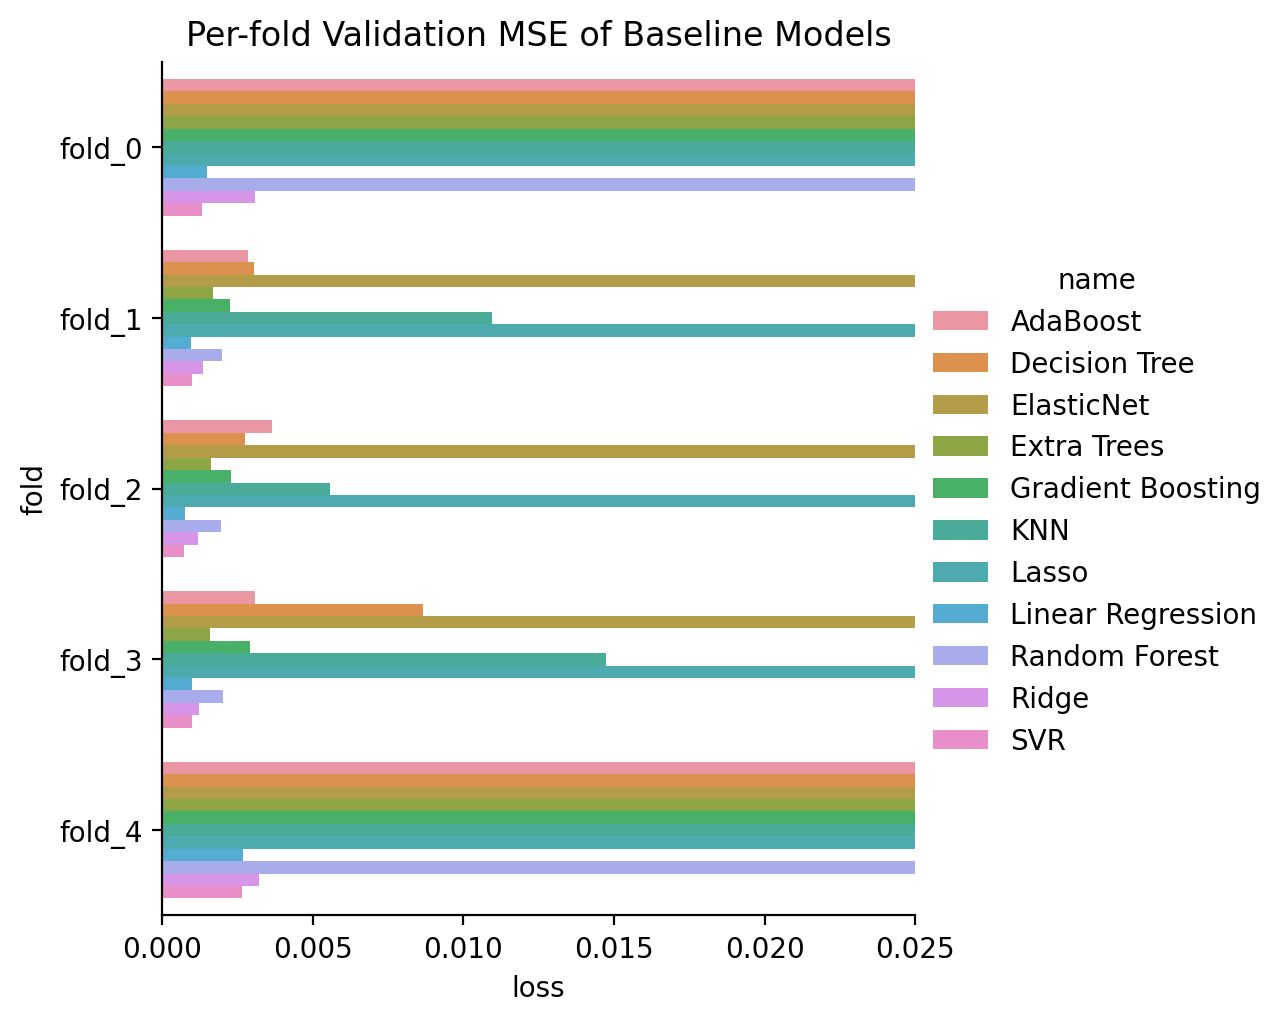

In [10]:
sns.catplot(
  data=val_mse_df,
  kind="bar",
  x="loss",
  y="fold",
  hue="name",
  orient="h"
)

plt.title("Per-fold Validation MSE of Baseline Models")
plt.xlim(0, 0.025)

plt.show()

In [11]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled.flatten())

    y_pred_test = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_pred_test, y_test_scaled)

    y_test_scaled_inv = y_scaler.inverse_transform(y_test_scaled)
    y_pred_test_inv = y_scaler.inverse_transform(y_pred_test.reshape(-1, 1))

    actual_scores = reg_scores(y_pred_test_inv, y_test_scaled_inv)

    baseline_test_scores.append((name, test_mse))
    baseline_test_scores_actual[name] = actual_scores

D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
test_mse_df = pd.DataFrame(baseline_test_scores, columns=["name", "loss"])
test_mse_df.set_index("name", inplace=True)
test_mse_df

,loss
name,
Linear Regression,0.001004
Lasso,3.076706
Ridge,0.001225
ElasticNet,1.015454
KNN,0.013714
SVR,0.001100
Decision Tree,0.004322
Random Forest,0.002341
Extra Trees,0.002079


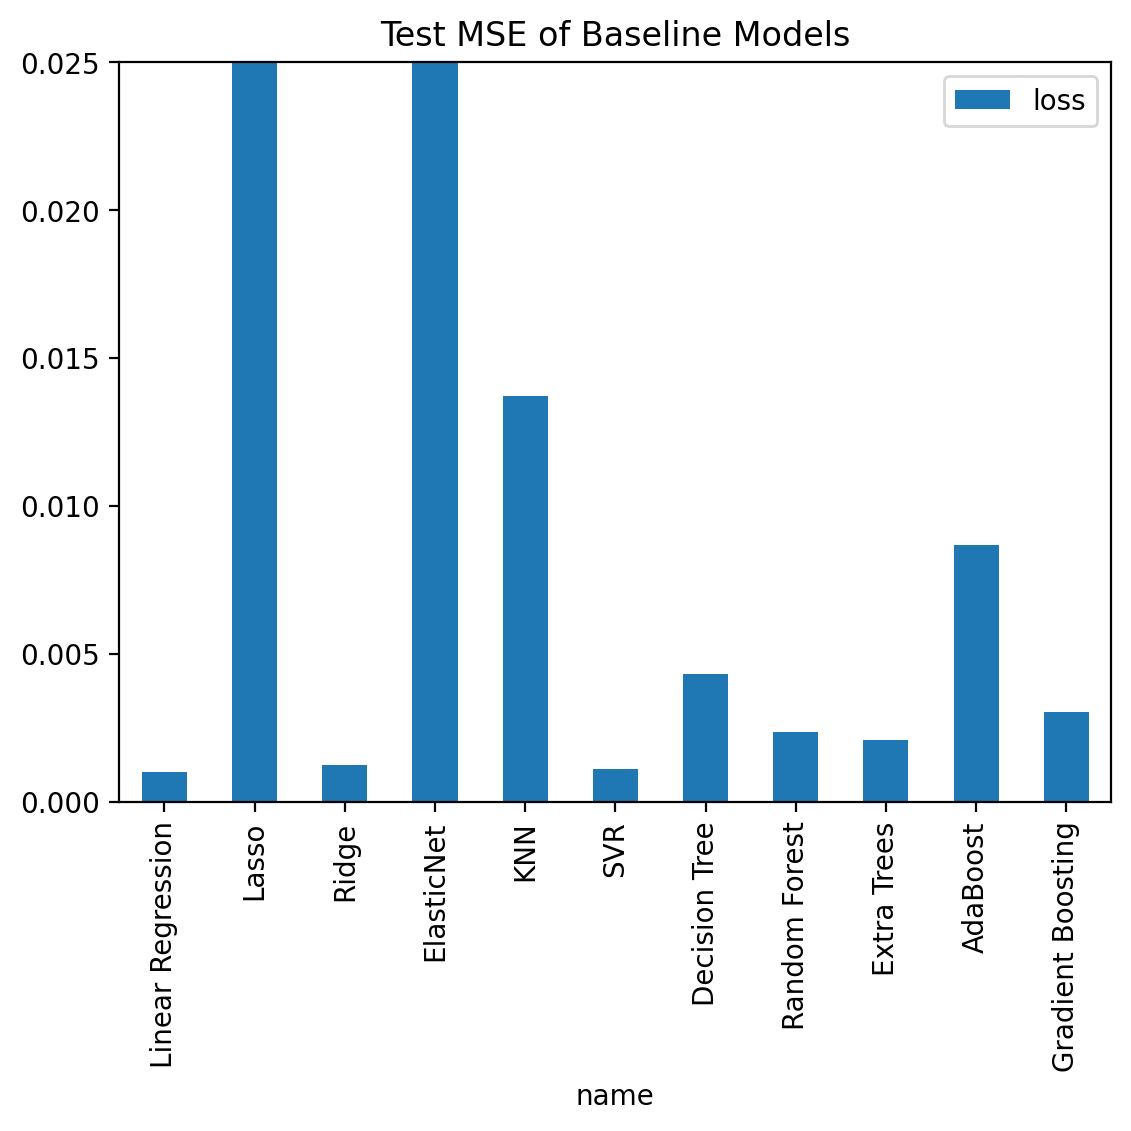

In [13]:
test_mse_df.plot.bar()

plt.title("Test MSE of Baseline Models")
plt.ylim(0, 0.025)

plt.show()

In [14]:
pd.DataFrame(baseline_test_scores_actual).T.sort_values(by="R2", ascending=False)

,MAE,MAPE,MSE,RMSE,R2
Linear Regression,2.846683,0.001886,12.872812,3.587870,0.996324
SVR,2.949928,0.001957,14.100473,3.755060,0.996019
Ridge,3.151106,0.002087,15.700585,3.962396,0.995507
Extra Trees,3.930082,0.002609,26.650643,5.162426,0.992368
Random Forest,4.219068,0.002804,30.009902,5.478129,0.991335
Gradient Boosting,4.842630,0.003215,38.782908,6.227592,0.988789
Decision Tree,5.671528,0.003765,55.407228,7.443603,0.984131
AdaBoost,8.745291,0.005759,111.353961,10.552439,0.968837
KNN,8.886005,0.005898,175.819176,13.259682,0.947493
Lasso,189.524732,0.111315,39443.483036,198.603834,0.000000
